In [ ]:
import pandas as pd
import numpy as np
from scipy import stats


def interferome_overlap(input1, input2):
    # open the rwo file, sheet masterproteins
    xlsx = pd.ExcelFile(input1)
# get the first sheet=master proteins as an object
    masterproteins = xlsx.parse(1)
# only the rows with defined values of Abundance Ratio: (Heavy) / (Light) are kept
    df = masterproteins[pd.notnull(masterproteins['Abundance Ratio: (Heavy) / (Light)'])]
    df=df.sort_values(['Abundance Ratio: (Heavy) / (Light)'], ascending = False)
    foldchange = np.array(df.loc[:,'Abundance Ratio: (Heavy) / (Light)'])
    hits = len(foldchange)
    
  # open the rwo file, sheet masterproteins
    xlsx = pd.ExcelFile(input2)
    df1 = xlsx.parse(0)
    df1.drop(df.index[0:18], inplace=True)
    df1.columns = df1.iloc[0]
    df1.drop(df1.index[0],inplace = True)

    IRG = 0
    for index, row in df1.iterrows():
        
        for row_num in range(len(foldchange)):
            
            if row['Gene Name'] == df.loc[:,'Description'][row_num][0:-1]:
                IRG += 1
                break
         
    
    return hits,IRG
    
    
numbers = np.array(interferome_overlap("20180319_04_Qp1_Nyberg_beads.xlsx","Interferome/Interferome_genelist.xlsx"))
print (numbers)
print (numbers[1])

def venn_3(background_size,total_IRG):
    
    n = numbers [0] #number of hits in my MS list = sample size
    
    x = numbers[1]-1 # number of IRG detected in my MS list
    pval = stats.hypergeom.sf(x,background_size,total_IRG,n, loc=0)
    print (pval)
    return (pval)

hyper_geom (20000,5523)

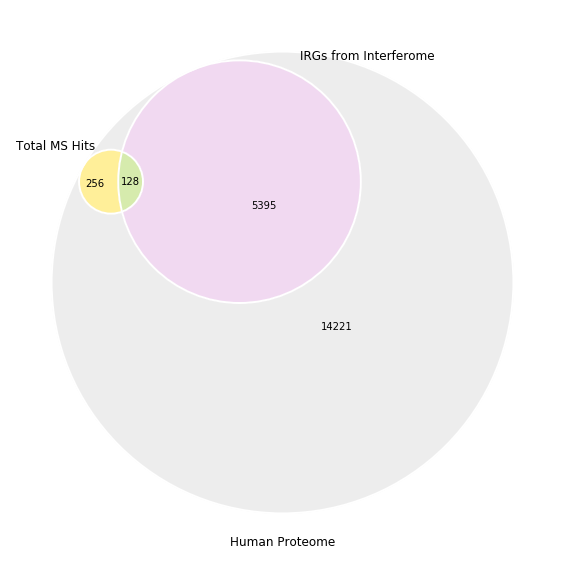

In [55]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
#from matplotlib_venn import venn2


plt.figure(figsize=(10,10))
# Make the diagram
s=(0, 0, 0, 20000-384-5523+128,256,5395,128)
v=venn3(subsets = s,set_labels=('Total MS Hits',"IRGs from Interferome","Human Proteome"))
#plt.text(0,0,'p = 0.0074367473350909511')
#v=venn3(subsets = (0, 0, 0, 20000-384-5523+128,256,5395,128),set_labels=('Total MS Hits',"IRGs from Interferome","Human Proteome"))
#plt.text(0,0,'p = 0.0074367473350909511')

v.get_patch_by_id('001').set_color('silver')
v.get_patch_by_id('011').set_color('plum')
v.get_patch_by_id('101').set_color('gold')
v.get_patch_by_id('111').set_color('yellowgreen')
c = venn3_circles(subsets=s, linestyle='solid',color ='white')
#c[0].set_ls('dotted')  # Line style
#c[1].set_ls('dashed')
#c[2].set_lw(1.0) 

plt.savefig('venn.eps', format='eps', dpi=1000)
#v.get_patch_by_id('100').set_alpha(1.0)
#v.get_patch_by_id('100').set_color('white')
plt.show()




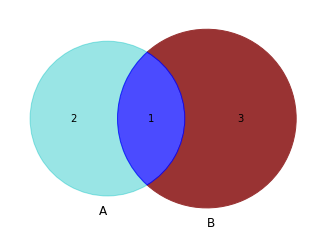

In [36]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles


# Subset sizes
s = (2,3,1)
 

v = venn2(subsets=s, set_labels=('A', 'B'))

# Subset labels
#v.get_label_by_id('10').set_text('A but not B')
#v.get_label_by_id('01').set_text('B but not A')
#v.get_label_by_id('11').set_text('A and B')

# Subset colors
v.get_patch_by_id('10').set_color('c')
v.get_patch_by_id('01').set_color('#993333')
v.get_patch_by_id('11').set_color('blue')

# Subset alphas
v.get_patch_by_id('10').set_alpha(0.4)
v.get_patch_by_id('01').set_alpha(1.0)
v.get_patch_by_id('11').set_alpha(0.7)

# Border styles
#c = venn2_circles(subsets=s, linestyle='solid')
#c[0].set_ls('dashed')  # Line style
#c[0].set_lw(2.0)       # Line width

plt.show()


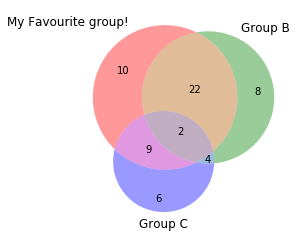

In [30]:
# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
 
# Custom text labels: change the label of group A
v=venn3(subsets = (10, 8, 22, 6,9,4,2), set_labels = ('Group A', 'Group B', 'Group C'))
v.get_label_by_id('A').set_text('My Favourite group!')
plt.show()

 

# Color
#v.get_patch_by_id('10').set_alpha(1.0)
v.get_patch_by_id('10').set_color('black')
plt.show()
